## Fuzzy C Means Clustering

FCM is an unsupervised clustering technique that allows us to partition the data points based on their degree of membership to the clusters. In traditional (hard partitioning) clustering techniques, a data point is assigned to a certain cluster. It either belongs to that cluster or not. In FCM, each data point's probability of belonging to every one of the clusters is calculated. This method gives better results than k-means especially when it comes to overlapped data sets. 
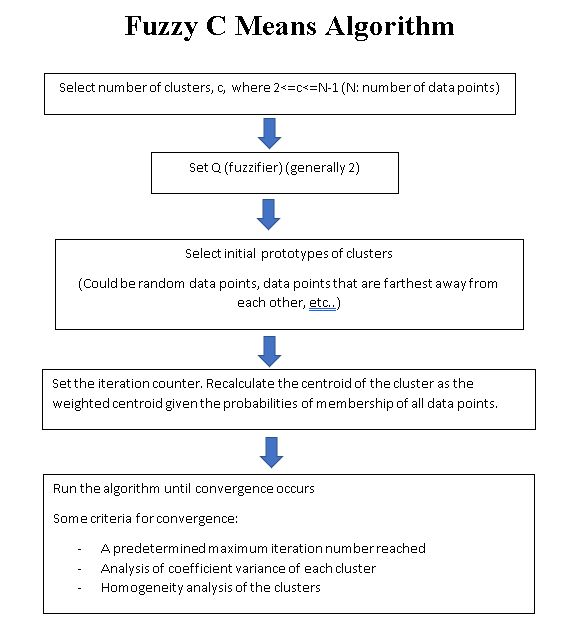

For pre-clustering assessment, we will use the following vat() and ivat() functions which can be found in pyclustertend library.

In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def vat(data, return_odm=False, figure_size=(10, 10)):
    """VAT means Visual assesement of tendency. basically, it allow to asses cluster tendency
    through a map based on the dissimiliraty matrix.


    Parameters
    ----------

    data : matrix
        numpy array

    return_odm : return the Ordered Dissimalirity Matrix
        boolean (default to False)

    figure_size : size of the VAT.
        tuple (default to (10,10))


    Return
    -------

    ODM : matrix
        the ordered dissimalarity matrix plotted.

    """

    ordered_dissimilarity_matrix = compute_ordered_dissimilarity_matrix(data)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_dissimilarity_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_dissimilarity_matrix))

    if return_odm is True:
        return ordered_dissimilarity_matrix



def compute_ordered_dissimilarity_matrix(X):
    """The ordered dissimilarity matrix is used by visual assesement of tendency. It is a just a a reordering
    of the dissimilarity matrix.


    Parameters
    ----------

    X : matrix
        numpy array

    Return
    -------

    ODM : matrix
        the ordered dissimalarity matrix .

    """

    # Step 1 :

    observation_path = []

    matrix_of_pairwise_distance = pairwise_distances(X)
    list_of_int = np.zeros(matrix_of_pairwise_distance.shape[0], dtype="int")

    index_of_maximum_value = np.argmax(matrix_of_pairwise_distance)

    column_index_of_maximum_value = index_of_maximum_value // matrix_of_pairwise_distance.shape[1]

    list_of_int[0] = column_index_of_maximum_value
    observation_path.append(column_index_of_maximum_value)

    K = np.linspace(0, matrix_of_pairwise_distance.shape[0] - 1, matrix_of_pairwise_distance.shape[0], dtype="int")
    J = np.delete(K, column_index_of_maximum_value)

    # Step 2 :

    for r in range(1, matrix_of_pairwise_distance.shape[0]):

        p, q = (-1, -1)

        mini = np.max(matrix_of_pairwise_distance)

        for candidate_p in observation_path:
            for candidate_j in J:
                if matrix_of_pairwise_distance[candidate_p, candidate_j] < mini:
                    p = candidate_p
                    q = candidate_j
                    mini = matrix_of_pairwise_distance[p, q]

        list_of_int[r] = q
        observation_path.append(q)

        ind_q = np.where(np.array(J) == q)[0][0]
        J = np.delete(J, ind_q)

    # Step 3

    ordered_matrix = np.zeros(matrix_of_pairwise_distance.shape)

    for column_index_of_maximum_value in range(ordered_matrix.shape[0]):
        for j in range(ordered_matrix.shape[1]):
            ordered_matrix[column_index_of_maximum_value, j] = matrix_of_pairwise_distance[
                list_of_int[column_index_of_maximum_value], list_of_int[j]]

    # Step 4 :

    return ordered_matrix




def ivat(data, return_odm=False, figure_size=(10, 10)):
    """iVat return a visualisation based on the Vat but more reliable and easier to
    interpret.


    Parameters
    ----------

    data : matrix
        numpy array

    return_odm : return the Ordered Dissimalirity Matrix
            boolean (default to False)

    figure_size : size of the VAT.
        tuple (default to (10,10))


    Return
    -------

    D_prim : matrix
        the ivat ordered dissimalarity matrix.

    """

    ordered_matrix = compute_ivat_ordered_dissimilarity_matrix(data)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_matrix))

    if return_odm is True:
        return ordered_matrix




def compute_ivat_ordered_dissimilarity_matrix(X):
    """The ordered dissimilarity matrix is used by ivat. It is a just a a reordering
    of the dissimilarity matrix.


    Parameters
    ----------

    X : matrix
        numpy array

    Return
    -------

    D_prim : matrix
        the ordered dissimalarity matrix .

    """

    ordered_matrix = compute_ordered_dissimilarity_matrix(X)
    re_ordered_matrix = np.zeros((ordered_matrix.shape[0], ordered_matrix.shape[0]))

    for r in range(1, ordered_matrix.shape[0]):
        # Step 1 : find j for which D[r,j] is minimum and j in [1:r-1]

        j = np.argmin(ordered_matrix[r, 0:r])

        # Step 2 :

        re_ordered_matrix[r, j] = ordered_matrix[r, j]

        # Step 3 : pour c : 1,r-1 avec c !=j
        c_tab = np.array(range(0, r))
        c_tab = c_tab[c_tab != j]

        for c in c_tab:
            re_ordered_matrix[r, c] = max(ordered_matrix[r, j], re_ordered_matrix[j, c])
            re_ordered_matrix[c, r] = re_ordered_matrix[r, c]

    return re_ordered_matrix


In [2]:
#import necessary libraries:
import glob
import pandas as pd
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from fcmeans import FCM
# absolute path to search all PMG files inside a specific folder
path = r'*.PGM'
files = glob.glob(path)

C:\Users\h\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
files

['4cov.PGM',
 'No_Clust.PGM',
 'No_Clust_nois_pt_01.PGM',
 'Three_Close_Clust.PGM',
 'Three_Close_Clust_nois_pt005.PGM',
 'Two_Clus_Diff_Density.PGM',
 'Two_Clus_Diff_Size.PGM',
 'Two_Ellip_Diff_Density.PGM',
 'Two_Ellip_Diff_Size.PGM',
 'Two_Separat_Clust.PGM',
 'Two_Separat_Clust_nois_pt005.PGM']

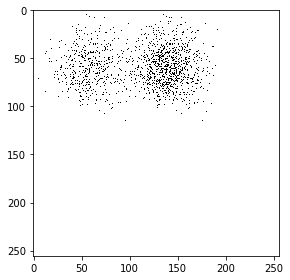

In [4]:
#Show one of the images
skimage.io.imshow("Two_Clus_Diff_Density.PGM", cmap='gray')

The image has black dots on a white background. Black dots are going to be investigated by the algorithm, so, we need to create an array where black dots have the value of 1 and white pixels have the value of 0 as they are irrelevant. Then, we will apply ivat() function to the obtained array.

The fuzzy algorithm requires data points' locations. The following function detects the data points' coordinates in the image (dataset) and returns them as an array.

In [5]:
def extract_points(im):
    
    X = []

    for i in range(len(im)):
        for j in range(len(im[i])):
            if im[i][j]==1:
                X.append([j,i])
    return np.array(X)
    

The following function applies fuzzy c means algorithm to the data points and plots the original image (dataset) and the resulting image with color coded clusters (with marked cluster centroids) for given values of number of clusters (n) and fuzzifier (q) number. It also saves these images. 

In [6]:
def apply_fcm(X, n, q, name):
    my_model = FCM(n_clusters=n, m=q) 
    my_model.fit(X) 

    centers = my_model.centers
    labels = my_model.predict(X)
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    axes[0].scatter(X[:,0], X[:,1], alpha=.9)
    axes[0].set_title("Original Image")
    axes[1].scatter(X[:,0], X[:,1], c=labels, alpha=.9)
    axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r')
    axes[1].set_title(f"Number of clusters: {n} Fuzzifier: {q}")
    title = "Number_of_clusters _{}_Fuzzifier_{}_for_{}.png".format(n, q, name)
    f.savefig(title)

### Image 1:

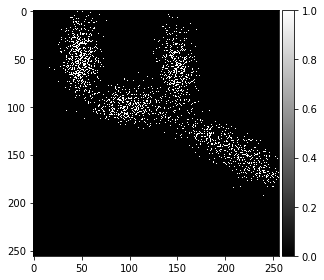

In [7]:
im1 = skimage.io.imread(files[0])
im1 = np.where(im1==255, 0, 1)
skimage.io.imshow(im1, cmap='gray')

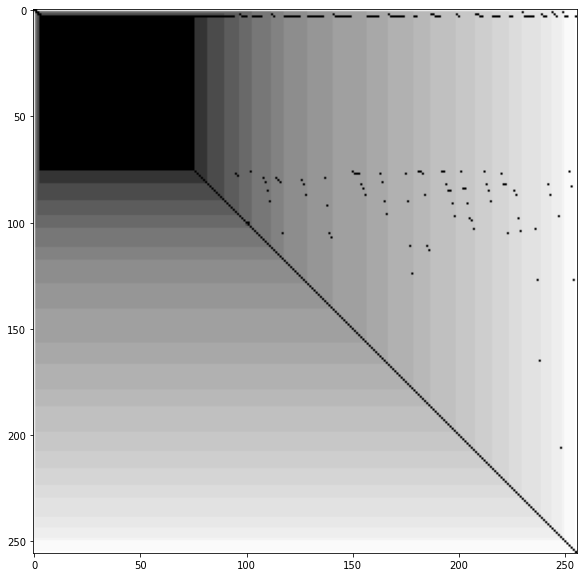

In [8]:
ivat(im1)

In the image, all data points look like one big cluster. So, the map shows one dominant black square. However, we can also see the 4 groups in the map represented by the squares a little bigger than the black square. The colors start fading after the first 4 squares.

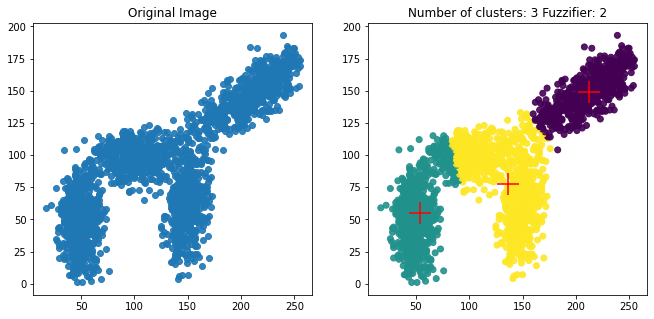

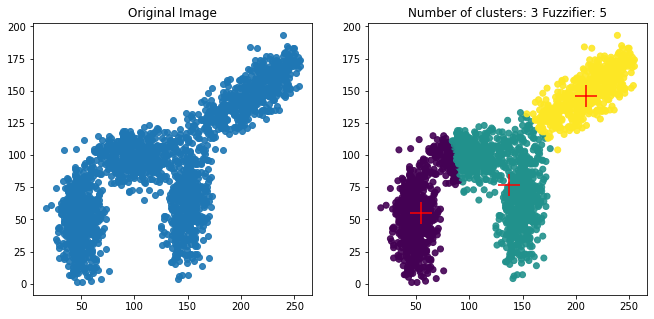

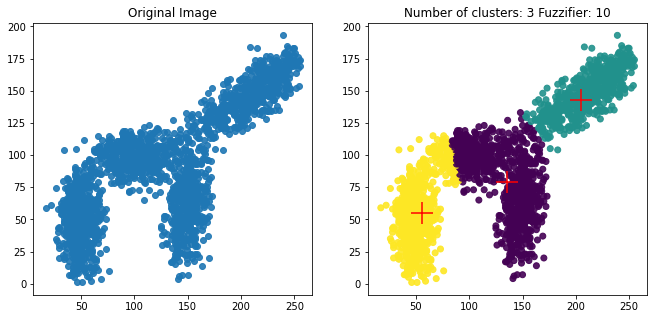

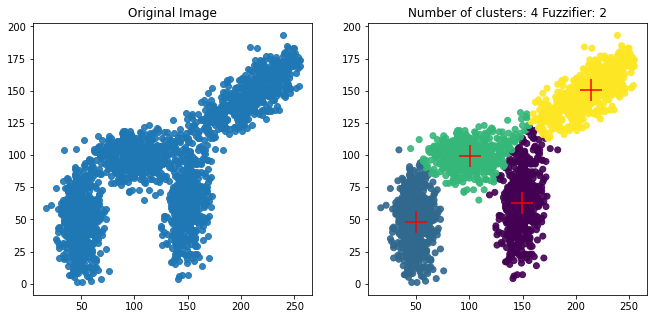

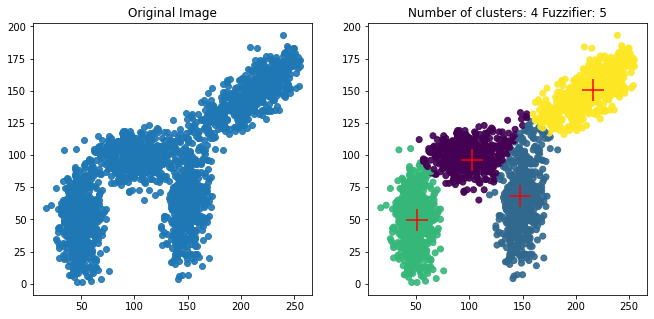

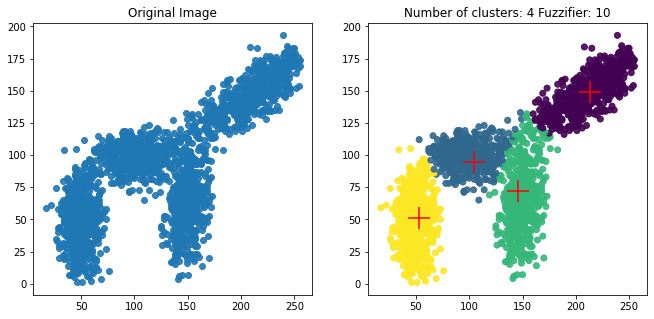

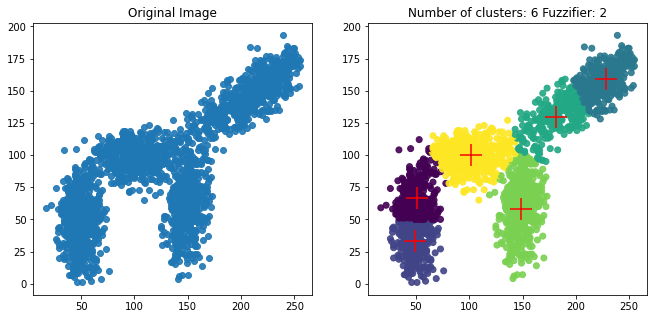

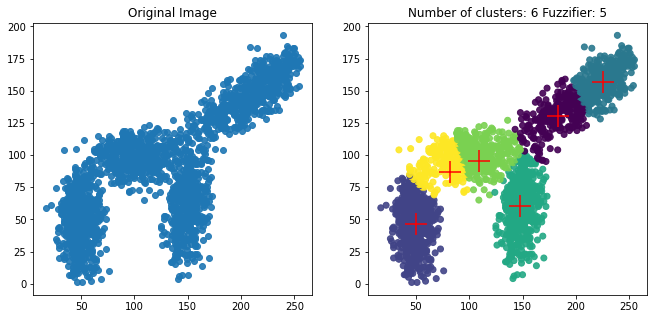

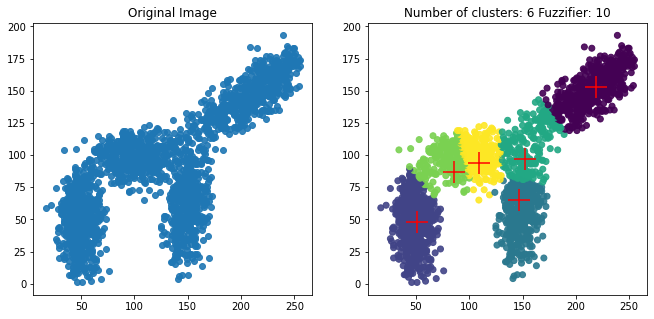

In [9]:
#Extract the coordinates of the data points 
X = extract_points(im1)
#Apply fcm with 3, 4, 6 clusters and q values of 2, 5, 10. 
for n in [3, 4, 6]:
    for q in [2, 5, 10]:
        apply_fcm(X, n, q, "Image1")

From the ivat map, we observed that the data would render four clusters. From the FCM images, we see that when cluster number is four and fuzzifier is selected as two, the centroids are placed right in the middle of clusters and farther apart from each other.  I would choose this one as outliers are identified correctly as well.

### Image 2:

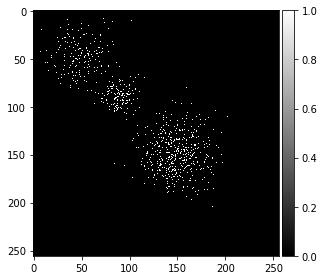

In [10]:
im2 = skimage.io.imread(files[3])
im2 = np.where(im2==255, 0, 1)
skimage.io.imshow(im2, cmap='gray')

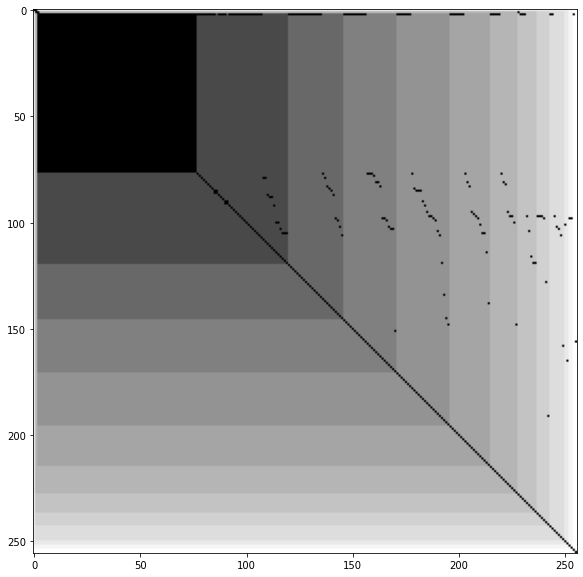

In [11]:
ivat(im2)

Here again, we see three prominent squares nested in each other corresponding to the three clusters seen in the dataset.

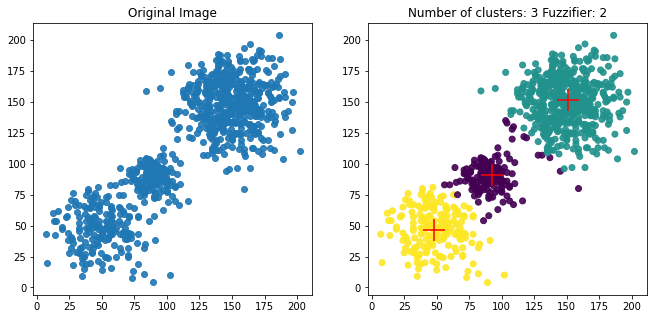

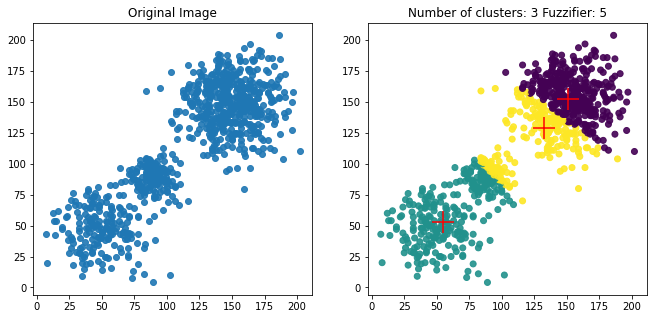

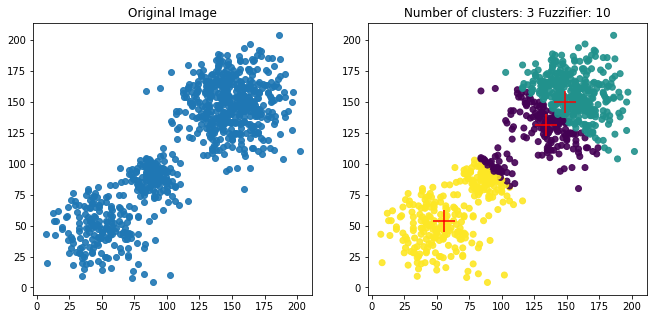

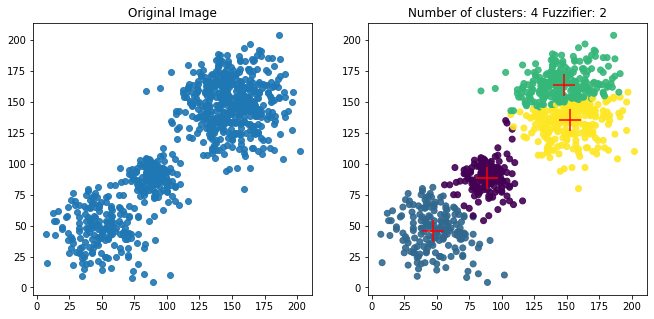

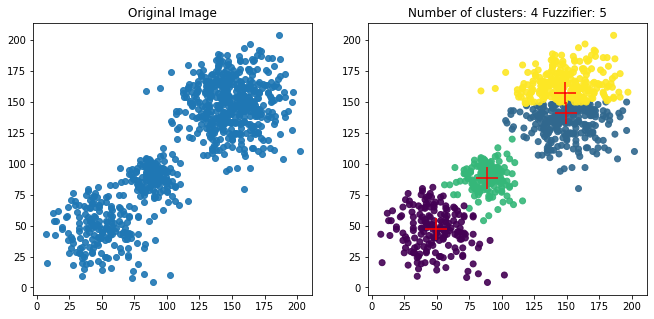

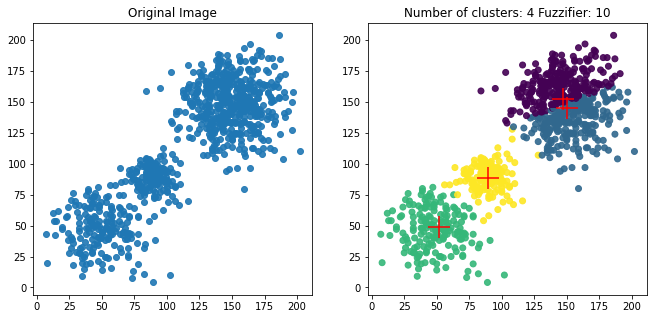

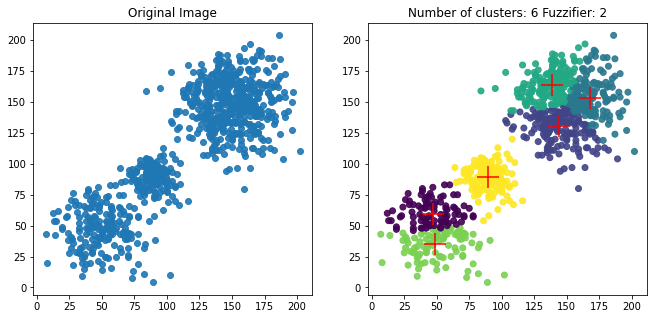

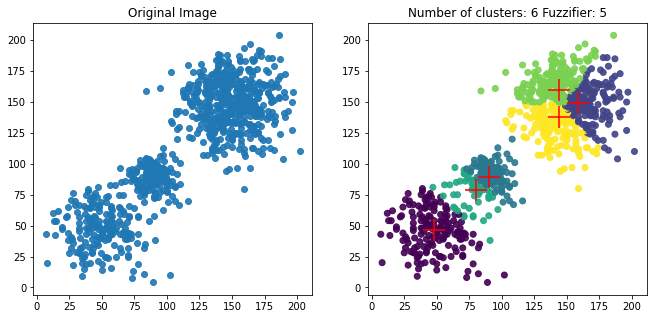

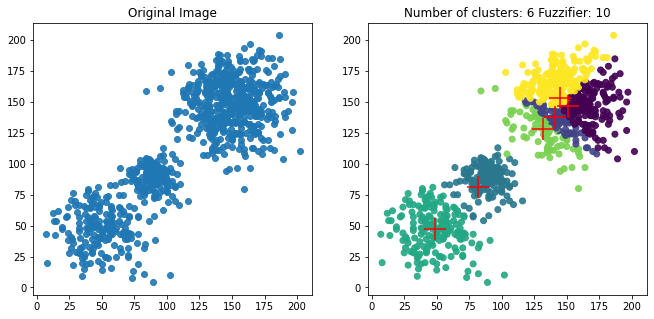

In [12]:
X = extract_points(im2)
for n in [3, 4, 6]:
    for q in [2, 5, 10]:
        apply_fcm(X, n, q, "Image2")

In the ivat map, we see three dark colored squares, so the data will probably be grouped into three clusters. FCM result for three clusters and fuzzifier of two, gives us the best result. Centroid placements are balanced with respect to the spread of data points and they are well spaced apart from each other. 

### Image 3:

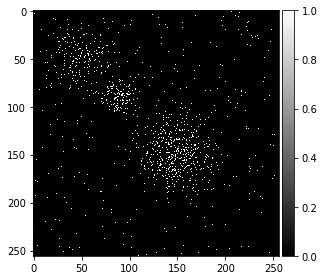

In [13]:
im3 = skimage.io.imread(files[4])
im3 = np.where(im3==255, 0, 1)
skimage.io.imshow(im3, cmap='gray')

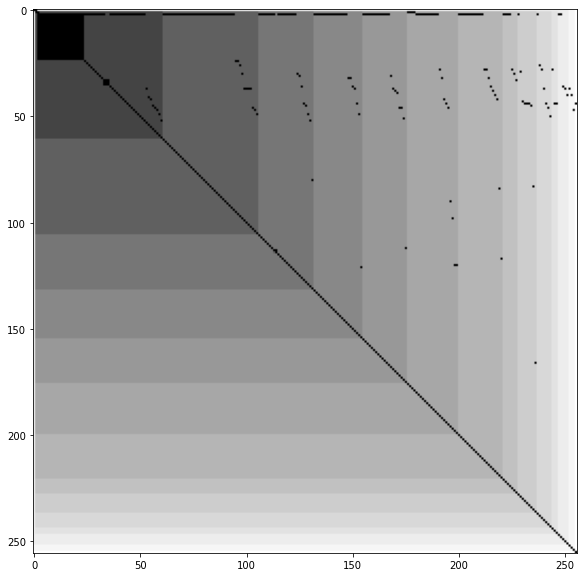

In [14]:
ivat(im3)

Spread out data is reflected by many squares in the map. Only three prominent ones represent the three clusters.

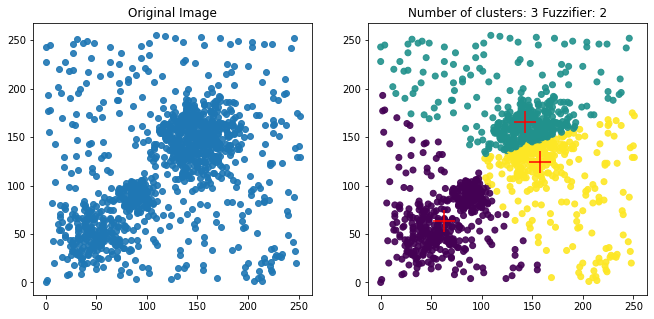

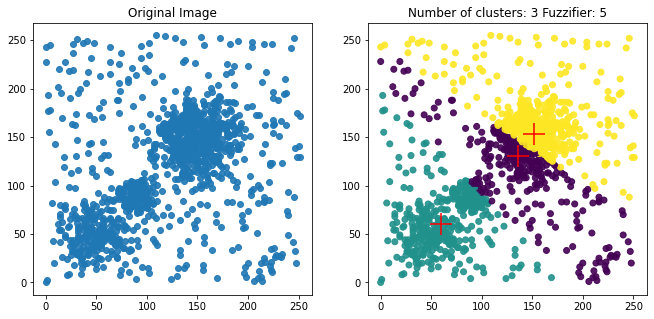

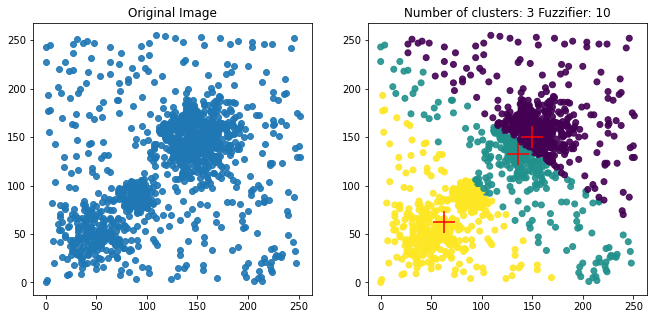

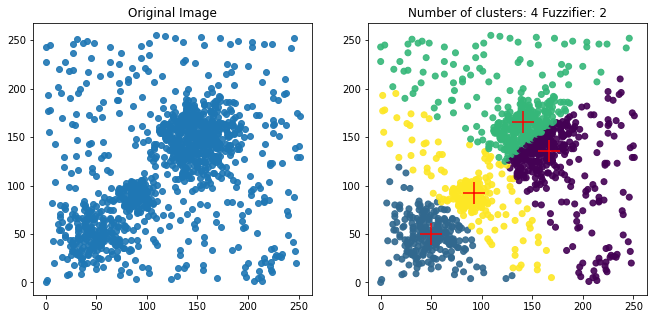

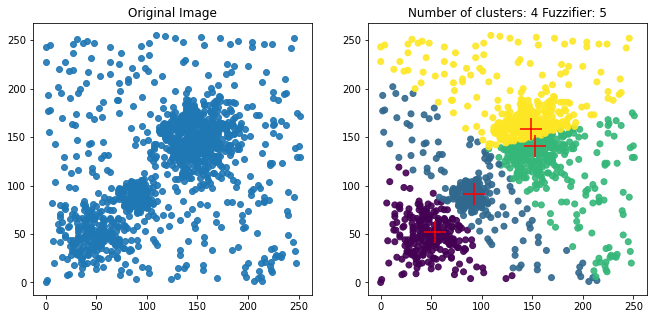

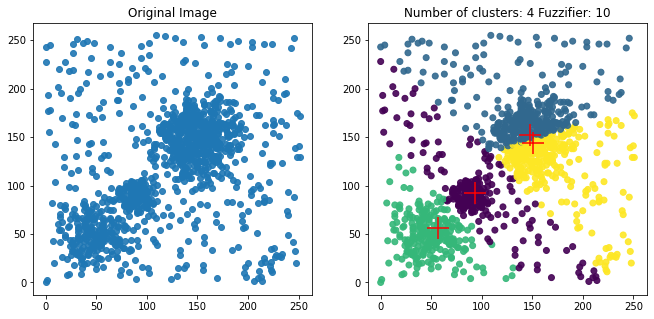

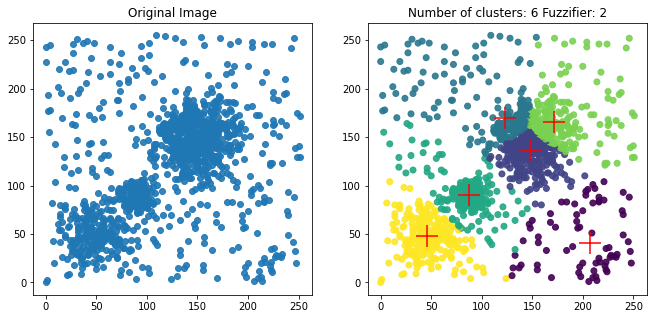

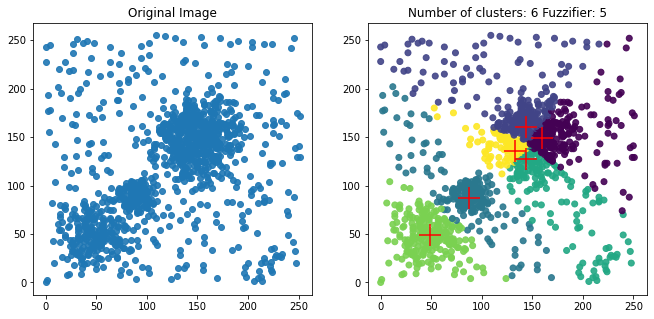

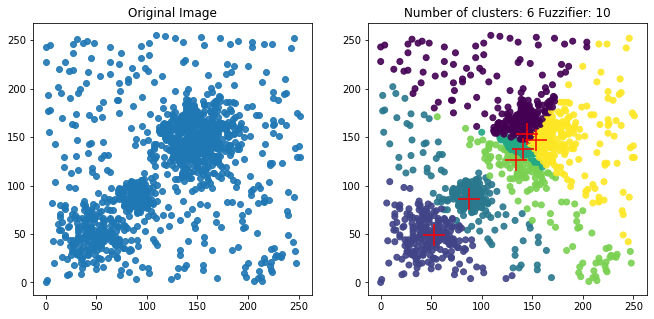

In [15]:
X = extract_points(im3)
for n in [3, 4, 6]:
    for q in [2, 5, 10]:
        apply_fcm(X, n, q, "Image3")

As ivat suggested, the data is pretty spread out. It seems like six clusters with a fuzzifier of 2 does a better job than the others.

### Image 4:

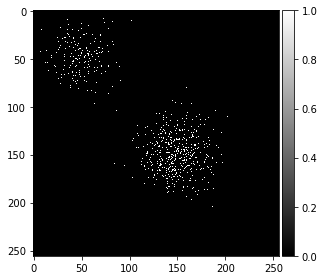

In [16]:
im4 = skimage.io.imread(files[9])
im4 = np.where(im4==255, 0, 1)
skimage.io.imshow(im4, cmap='gray')

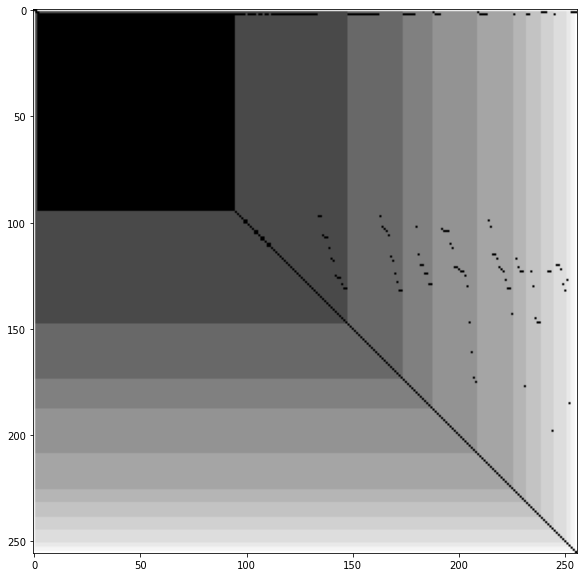

In [17]:
ivat(im4)

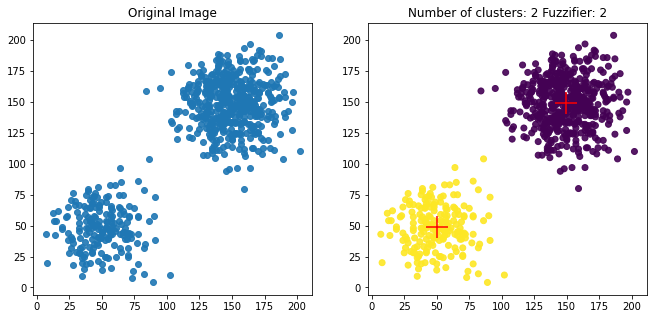

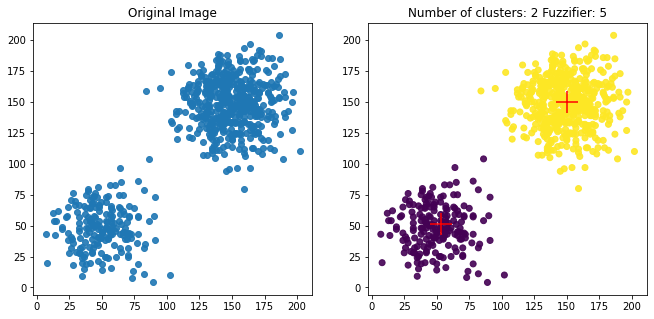

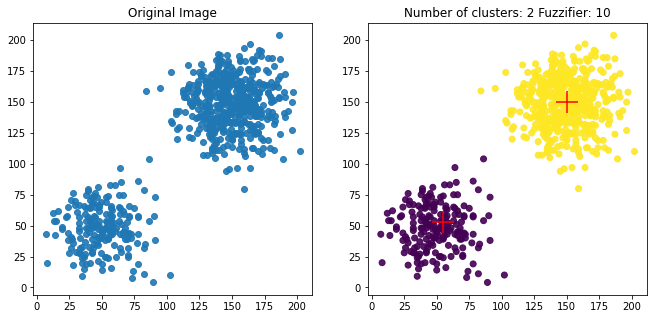

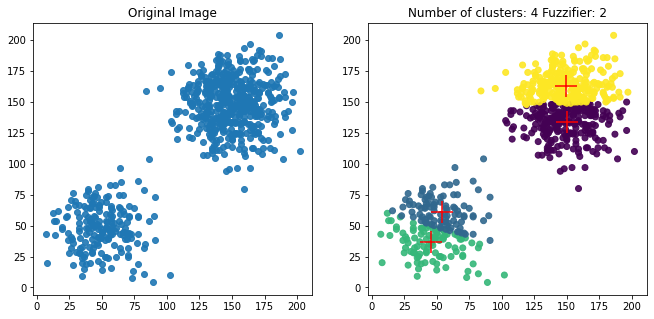

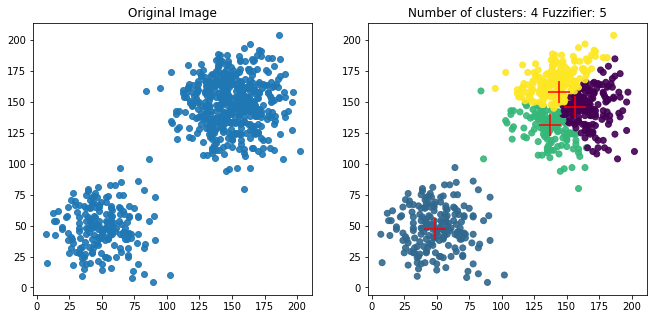

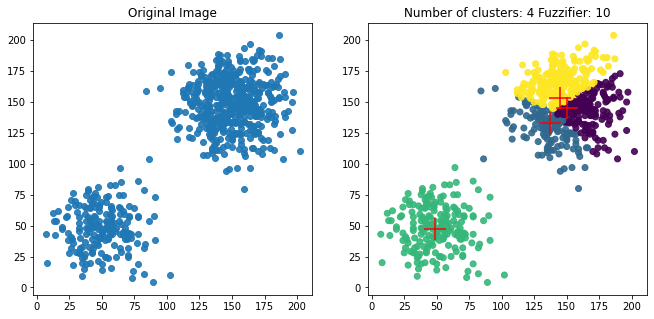

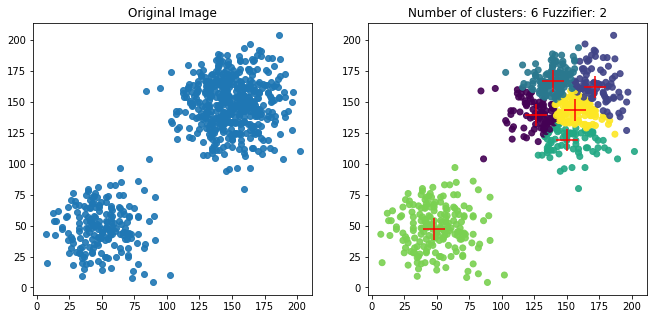

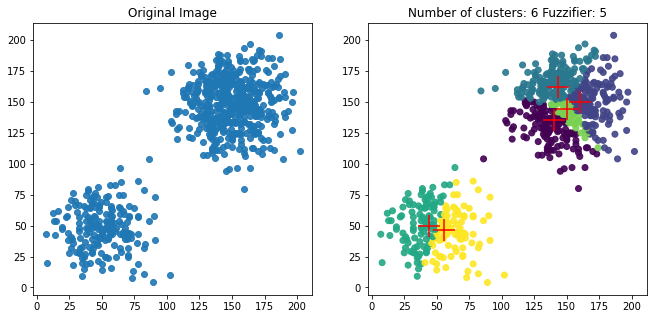

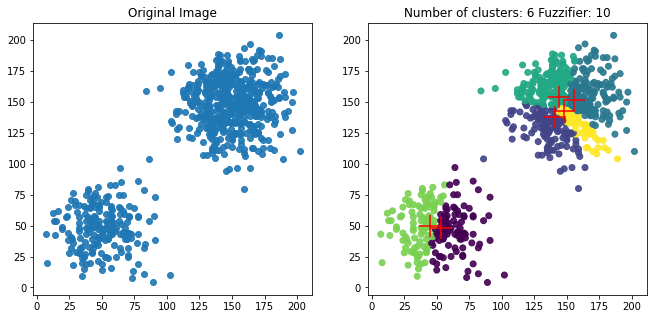

In [18]:
X = extract_points(im4)
for n in [2, 4, 6]:
    for q in [2, 5, 10]:
        apply_fcm(X, n, q, "Image4")

Data is fairly spread out with two prominent clusters detected by ivat. By using FCM with two clusters and any number of fuzzifier we were able to group data into two clusters perfectly.

### Image 5:

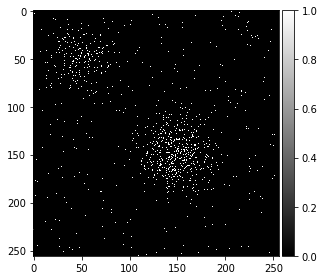

In [19]:
im5 = skimage.io.imread(files[10])
im5 = np.where(im5==255, 0, 1)
skimage.io.imshow(im5, cmap='gray')

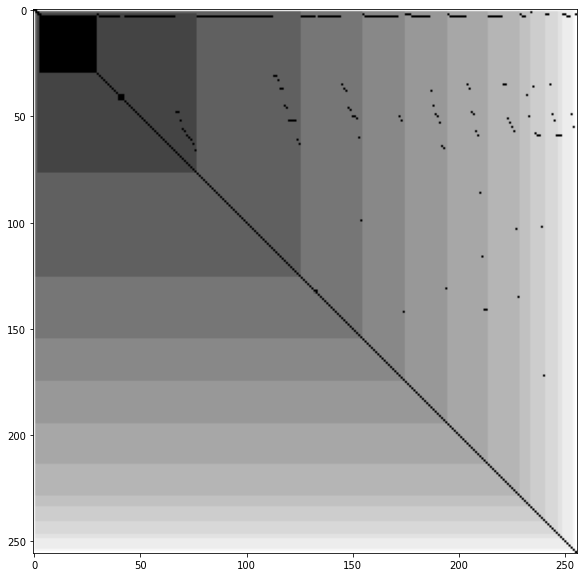

In [20]:
ivat(im5)

Data is spread out with two to four prominent clusters.

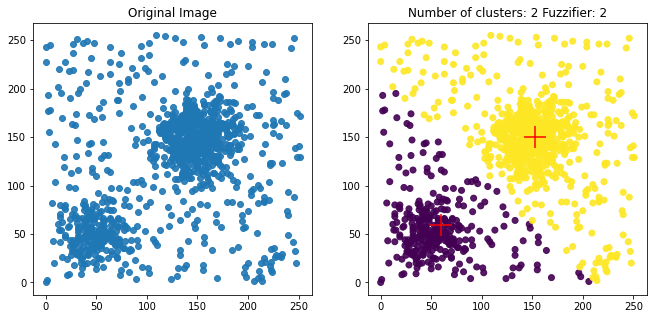

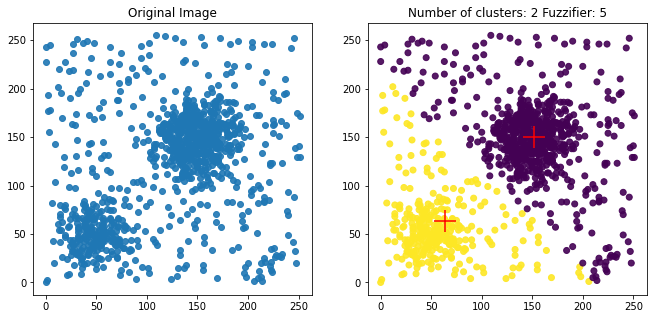

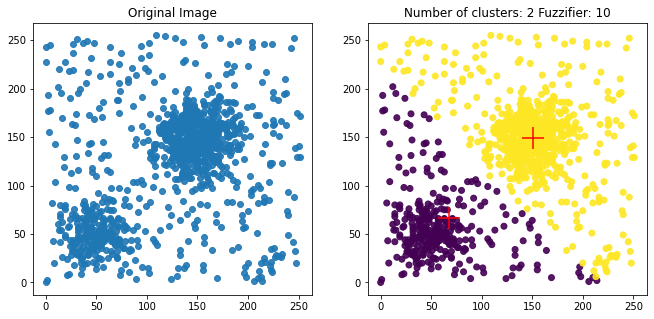

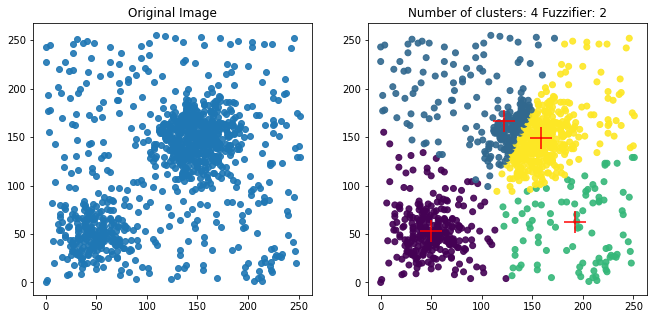

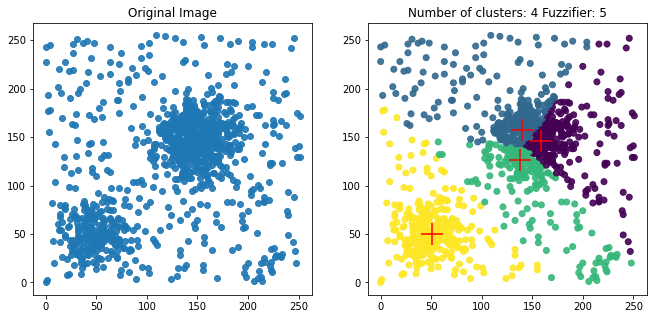

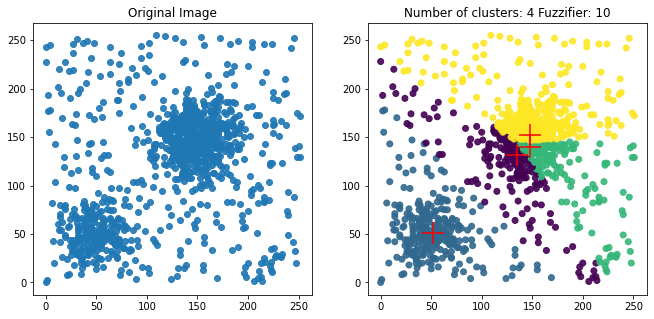

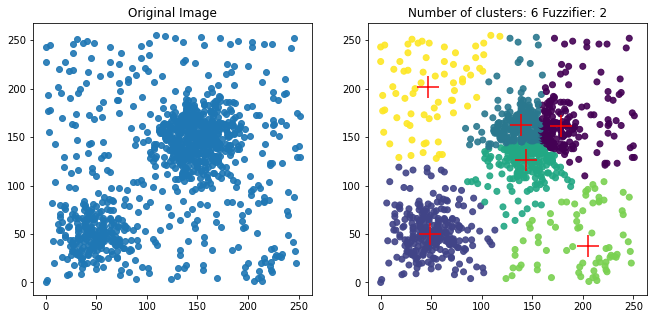

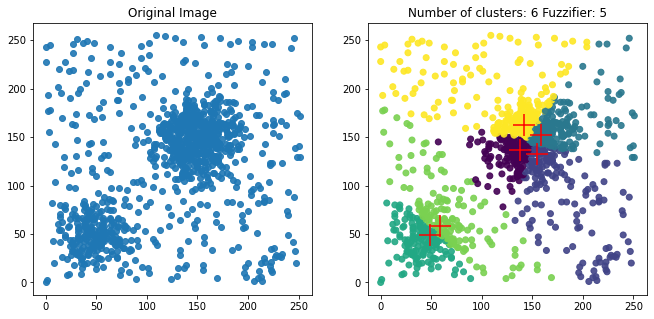

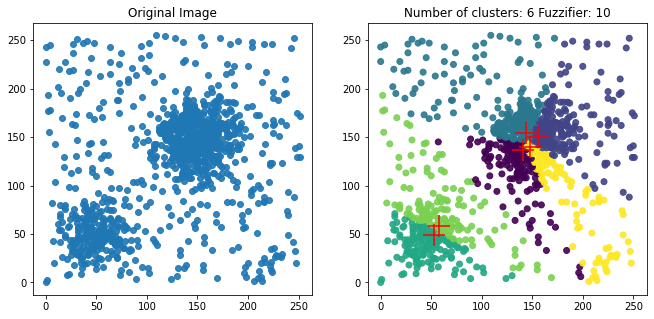

In [21]:
X = extract_points(im5)
for n in [2, 4, 6]:
    for q in [2, 5, 10]:
        apply_fcm(X, n, q, "Image5")

As ivat suggested, two or four clusters with a fuzzifier of two seems to be the best choice.

## Conclusion:

We observe that FCM does a very good job in clustering the data. We would like the centroids to be spaced apart and be reflective of the spread of the data in each cluster. As fuzzifier increases, the centroids start coming closer to each other, so it is best to keep fuzzifier around 2 which is also the default value. As data gets noisier, higher number of clusters is better as in this case the outliers are better identified. As the data groups gets more compact, lower number of clusters should be chosen as they better represent the data. 
FCM results go hand in hand with ivat results especially when there is less noise and groups are more compact. 